**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from scipy import optimize

import matplotlib.pyplot as plt

import problem1
import problem2
import problem3

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


# chaten løser opgaven 

In [156]:
import numpy as np
from scipy.optimize import minimize_scalar

# Constants
# firms
A = 1.0
gamma = 0.5

# households
alpha = 0.3
nu = 1.0
epsilon = 2.0

# government
tau = 0.0
T = 0.0

# Question 3
kappa = 0.1

w = 1  # Numeraire

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Optimal behavior for firms
def firm_behavior(w, p, A, gamma):
    ell_star = (p * A * gamma / w) ** (1 / (1 - gamma))
    y_star = A * (ell_star ** gamma)
    pi_star = (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))
    return ell_star, y_star, pi_star #optimal labor, output, profit givent the parameters

# Consumer behavior
def consumer_behavior(w, p1, p2, tau, T, alpha, nu, epsilon, pi1_star, pi2_star):
    def utility(ell):
        income = w * ell + T + pi1_star + pi2_star
        c1 = alpha * income / p1
        c2 = (1 - alpha) * income / (p2 + tau)
        return np.log(c1**alpha * c2**(1 - alpha)) - nu * ell**(1 + epsilon) / (1 + epsilon)
    
    result = minimize_scalar(lambda ell: -utility(ell), bounds=(0, 10), method='bounded')
    ell_star = result.x
    income = w * ell_star + T + pi1_star + pi2_star
    c1_star = alpha * income / p1
    c2_star = (1 - alpha) * income / (p2 + tau)
    return ell_star, c1_star, c2_star

# Check market clearing conditions
market_clearing_results = []

for p1 in p1_range:
    for p2 in p2_range:
        ell1_star, y1_star, pi1_star = firm_behavior(w, p1, A, gamma)
        ell2_star, y2_star, pi2_star = firm_behavior(w, p2, A, gamma)
        ell_star, c1_star, c2_star = consumer_behavior(w, p1, p2, tau, T, alpha, nu, epsilon, pi1_star, pi2_star)
        
        # Market clearing conditions
        market_clearing_y1 = np.isclose(y1_star, c1_star)
        market_clearing_y2 = np.isclose(y2_star, c2_star)
        
        market_clearing_results.append((p1, p2, market_clearing_y1, market_clearing_y2))

# Display results
print("p1\tp2\tMarket Clearing for Good 1\tMarket Clearing for Good 2")
for result in market_clearing_results:
    p1, p2, market_clearing_y1, market_clearing_y2 = result
    print(f"{p1:.2f}\t{p2:.2f}\t{market_clearing_y1}\t\t\t{market_clearing_y2}")

p1	p2	Market Clearing for Good 1	Market Clearing for Good 2
0.10	0.10	False			False
0.10	0.31	False			False
0.10	0.52	False			False
0.10	0.73	False			False
0.10	0.94	False			False
0.10	1.16	False			False
0.10	1.37	False			False
0.10	1.58	False			False
0.10	1.79	False			False
0.10	2.00	False			False
0.31	0.10	False			False
0.31	0.31	False			False
0.31	0.52	False			False
0.31	0.73	False			False
0.31	0.94	False			False
0.31	1.16	False			False
0.31	1.37	False			False
0.31	1.58	False			False
0.31	1.79	False			False
0.31	2.00	False			False
0.52	0.10	False			False
0.52	0.31	False			False
0.52	0.52	False			False
0.52	0.73	False			False
0.52	0.94	False			False
0.52	1.16	False			False
0.52	1.37	False			False
0.52	1.58	False			False
0.52	1.79	False			False
0.52	2.00	False			False
0.73	0.10	False			False
0.73	0.31	False			False
0.73	0.52	False			False
0.73	0.73	False			False
0.73	0.94	False			False
0.73	1.16	False			False
0.73	1.37	False			False
0.73	1.58	False			False
0.73	1.79	False			False
0.73

In [155]:
import numpy as np
from scipy.optimize import fsolve

# firms
A = 1.0
gamma = 0.5

# households
alpha = 0.3
nu = 1.0
epsilon = 2.0

# government
tau = 0.0
T = 0.0

# Question 3
kappa = 0.1

w = 1  # Numeraire

# Optimal behavior for firms
def firm_behavior(w, p, A, gamma):
    ell_star = (p * A * gamma / w) ** (1 / (1 - gamma))
    y_star = A * (ell_star ** gamma)
    pi_star = (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))
    return ell_star, y_star, pi_star


# Consumer behavior
def consumer_behavior(w, p1, p2, tau, T, alpha, nu, epsilon, pi1_star, pi2_star):
    def utility(ell):
        income = w * ell + T + pi1_star + pi2_star
        c1 = alpha * income / p1
        c2 = (1 - alpha) * income / (p2 + tau)
        return np.log(c1**alpha * c2**(1 - alpha)) - nu * ell**(1 + epsilon) / (1 + epsilon)
    
    result = minimize_scalar(lambda ell: -utility(ell), bounds=(0, 10), method='bounded')
    ell_star = result.x
    income = w * ell_star + T + pi1_star + pi2_star
    c1_star = alpha * income / p1
    c2_star = (1 - alpha) * income / (p2 + tau)
    return ell_star, c1_star, c2_star

# Market clearing conditions
def market_clearing(prices):
    p1, p2 = prices
    ell1_star, y1_star, pi1_star = firm_behavior(w, p1, A, gamma)
    ell2_star, y2_star, pi2_star = firm_behavior(w, p2, A, gamma)
    ell_star, c1_star, c2_star = consumer_behavior(w, p1, p2, tau, T, alpha, nu, epsilon, pi1_star, pi2_star)
    
    # Market clearing conditions
    market_clearing_y1 = y1_star - c1_star
    market_clearing_y2 = y2_star - c2_star
    
    return [market_clearing_y1, market_clearing_y2]

# Initial guess for prices
initial_guess = [0.1, 0.1]

# Find equilibrium prices
equilibrium_prices = fsolve(market_clearing, initial_guess)
p1_eq, p2_eq = equilibrium_prices

print(f"Equilibrium price for good 1: {p1_eq}")
print(f"Equilibrium price for good 2: {p2_eq}")

Equilibrium price for good 1: 0.9759310400316733
Equilibrium price for good 2: 1.4907592880007094


In [157]:
import numpy as np
from scipy.optimize import minimize_scalar

# firms
A = 1.0
gamma = 0.5

# households
alpha = 0.3
nu = 1.0
epsilon = 2.0


# Question 3
kappa = 0.1

w = 1  # Numeraire

# Optimal behavior for firms
def firm_behavior(w, p, A, gamma):
    ell_star = (p * A * gamma / w) ** (1 / (1 - gamma))
    y_star = A * (ell_star ** gamma)
    pi_star = (1 - gamma) / gamma * w * (p * A * gamma / w) ** (1 / (1 - gamma))
    return ell_star, y_star, pi_star

# Consumer behavior
def consumer_behavior(w, p1, p2, tau, T, alpha, nu, epsilon, pi1_star, pi2_star):
    def utility(ell):
        income = w * ell + T + pi1_star + pi2_star
        c1 = alpha * income / p1
        c2 = (1 - alpha) * income / (p2 + tau)
        return np.log(c1**alpha * c2**(1 - alpha)) - nu * ell**(1 + epsilon) / (1 + epsilon)
    
    result = minimize_scalar(lambda ell: -utility(ell), bounds=(0, 10), method='bounded')
    ell_star = result.x
    income = w * ell_star + T + pi1_star + pi2_star
    c1_star = alpha * income / p1
    c2_star = (1 - alpha) * income / (p2 + tau)
    U = np.log(c1_star**alpha * c2_star**(1 - alpha)) - nu * ell_star**(1 + epsilon) / (1 + epsilon)
    return ell_star, c1_star, c2_star, U

# Social welfare function
def social_welfare(tau):
    p1 = 1
    p2 = 1
    T = tau * c2_initial_guess  # Initial guess for T based on tau
    ell1_star, y1_star, pi1_star = firm_behavior(w, p1, A, gamma)
    ell2_star, y2_star, pi2_star = firm_behavior(w, p2, A, gamma)
    ell_star, c1_star, c2_star, U = consumer_behavior(w, p1, p2, tau, T, alpha, nu, epsilon, pi1_star, pi2_star)
    return -(U - kappa * y2_star)  # Negate for minimization

# Initial guess for c2 to estimate T
ell1_star, y1_star, pi1_star = firm_behavior(w, 1, A, gamma)
ell2_star, y2_star, pi2_star = firm_behavior(w, 1, A, gamma)
ell_star, c1_star, c2_initial_guess, U = consumer_behavior(w, 1, 1, 0.1, 0.1 * y2_star, alpha, nu, epsilon, pi1_star, pi2_star)

# Optimize tau to maximize social welfare
result = minimize_scalar(social_welfare, bounds=(0, 1), method='bounded')
optimal_tau = result.x

# Calculate T based on optimal tau
ell1_star, y1_star, pi1_star = firm_behavior(w, 1, A, gamma)
ell2_star, y2_star, pi2_star = firm_behavior(w, 1, A, gamma)
ell_star, c1_star, c2_star, U = consumer_behavior(w, 1, 1, optimal_tau, optimal_tau * c2_initial_guess, alpha, nu, epsilon, pi1_star, pi2_star)
optimal_T = optimal_tau * c2_star

print(f"Optimal tau: {optimal_tau}")
print(f"Optimal T: {optimal_T}")

Optimal tau: 0.9999940391390134
Optimal T: 0.7285717991365546


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [171]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

### forsøg efter lecter slides # Production economy: Workers and capitalists

1.1 consumer

In [172]:
#consumer utility function
def utility(c1, c2, l, par):
    """utility for consumer"""

    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l**(1 + 1/par.epsilon) / (1 + 1/par.epsilon)

def consumer(p_1, p_2, w, par):
    """maximize utility for consumer"""

    pi_1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    pi_2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    def obj(l):

        c1 = par.alpha * (w * l + par.T + pi_1 + pi_2) / p_1
        c2 = (1 - par.alpha) * (w * l + par.T + pi_1 + pi_2) / (p_2 + par.tau)
        return -utility(c1, c2, l, par)
    
    res = optimize.minimize_scalar(obj,bounds=(0,1),method='bounded')

    l_star_c = res.x
    c1_star_c = par.alpha * (w * l_star_c + par.T + pi_1 + pi_2) / p_1
    c2_star_c = (1 - par.alpha) * (w * l_star_c + par.T + pi_1 + pi_2) / (p_2 + par.tau)
    
    return c1_star_c, c2_star_c, l_star_c
    

In [173]:
w=1.0
for p_1 in [0.5,1,1.5]:
    for p_2 in [0.5,1,1.5]:
        c1,c2,l = consumer(p_1,p_2,w,par)
        print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> c1 = {c1:.2f}, c2 = {c2:.2f}, l = {l:.2f}')

p_1 = 0.50, p_2 = 0.50 -> c1 = 0.63, c2 = 1.46, l = 0.92
p_1 = 0.50, p_2 = 1.00 -> c1 = 0.67, c2 = 0.78, l = 0.80
p_1 = 0.50, p_2 = 1.50 -> c1 = 0.75, c2 = 0.59, l = 0.63
p_1 = 1.00, p_2 = 0.50 -> c1 = 0.33, c2 = 1.56, l = 0.80
p_1 = 1.00, p_2 = 1.00 -> c1 = 0.36, c2 = 0.84, l = 0.70
p_1 = 1.00, p_2 = 1.50 -> c1 = 0.41, c2 = 0.63, l = 0.54
p_1 = 1.50, p_2 = 0.50 -> c1 = 0.25, c2 = 1.76, l = 0.63
p_1 = 1.50, p_2 = 1.00 -> c1 = 0.27, c2 = 0.95, l = 0.54
p_1 = 1.50, p_2 = 1.50 -> c1 = 0.31, c2 = 0.72, l = 0.42


1.2 firm 1 and 2

In [175]:
def firm_1(p_1, w, par):
    """maximize profit for firm 1"""

    l_star_f1 = ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    y_star_f1 = par.A * (l_star_f1) ** par.gamma
    pi_star_f1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    return l_star_f1, y_star_f1, pi_star_f1

def firm_2(p_2, w, par):
    """maximize profit for firm 2"""

    l_star_f2 = ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    y_star_f2 = par.A * (l_star_f2) ** par.gamma
    pi_star_f2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    return l_star_f2, y_star_f2, pi_star_f2

In [176]:
w=1.0
for p_1 in [0.5,1,1.5]:
    l_star_f1,y_star_f1,pi_star_f1 = firm_1(p_1, w, par)
    print(f'p_1 = {p_1:.2f}, -> l_star_f1 = {l_star_f1:.2f}, y_star_f1 = {y_star_f1:.2f}, pi_stat_f1 = {pi_star_f1:.2f}')

for p_2 in [0.5,1,1.5]:
    l_star_f2,y_star_f2,pi_star_f2 = firm_2(p_2, w, par)
    print(f'p_2 = {p_2:.2f}, -> l_star_f2 = {l_star_f2:.2f}, y_star_f2 = {y_star_f2:.2f}, pi_stat_f2 = {pi_star_f2:.2f}')

p_1 = 0.50, -> l_star_f1 = 0.06, y_star_f1 = 0.25, pi_stat_f1 = 0.06
p_1 = 1.00, -> l_star_f1 = 0.25, y_star_f1 = 0.50, pi_stat_f1 = 0.25
p_1 = 1.50, -> l_star_f1 = 0.56, y_star_f1 = 0.75, pi_stat_f1 = 0.56
p_2 = 0.50, -> l_star_f2 = 0.06, y_star_f2 = 0.25, pi_stat_f2 = 0.06
p_2 = 1.00, -> l_star_f2 = 0.25, y_star_f2 = 0.50, pi_stat_f2 = 0.25
p_2 = 1.50, -> l_star_f2 = 0.56, y_star_f2 = 0.75, pi_stat_f2 = 0.56


1.3 check for market clearing 

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$

In [178]:
# Check market clearing conditions
w = 1  # Numeraire

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

market_clearing_results = []

for p1 in p1_range:
    for p2 in p2_range:
        c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
        l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
        l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
        
        # Market clearing conditions
        market_clearing_y1 = np.isclose(y_star_f1, c1_star_c)
        market_clearing_y2 = np.isclose(y_star_f2, c2_star_c)
        
        market_clearing_results.append((p1, p2, market_clearing_y1, market_clearing_y2))

# Display results
print("p1\tp2\tMarket Clearing for Good 1\tMarket Clearing for Good 2")
for result in market_clearing_results:
    p1, p2, market_clearing_y1, market_clearing_y2 = result
    print(f"{p1:.2f}\t{p2:.2f}\t{market_clearing_y1}\t\t\t{market_clearing_y2}")

p1	p2	Market Clearing for Good 1	Market Clearing for Good 2
0.10	0.10	False			False
0.10	0.31	False			False
0.10	0.52	False			False
0.10	0.73	False			False
0.10	0.94	False			False
0.10	1.16	False			False
0.10	1.37	False			False
0.10	1.58	False			False
0.10	1.79	False			False
0.10	2.00	False			False
0.31	0.10	False			False
0.31	0.31	False			False
0.31	0.52	False			False
0.31	0.73	False			False
0.31	0.94	False			False
0.31	1.16	False			False
0.31	1.37	False			False
0.31	1.58	False			False
0.31	1.79	False			False
0.31	2.00	False			False
0.52	0.10	False			False
0.52	0.31	False			False
0.52	0.52	False			False
0.52	0.73	False			False
0.52	0.94	False			False
0.52	1.16	False			False
0.52	1.37	False			False
0.52	1.58	False			False
0.52	1.79	False			False
0.52	2.00	False			False
0.73	0.10	False			False
0.73	0.31	False			False
0.73	0.52	False			False
0.73	0.73	False			False
0.73	0.94	False			False
0.73	1.16	False			False
0.73	1.37	False			False
0.73	1.58	False			False
0.73	1.79	False			False
0.73

In [169]:
#check for good market 1 clearing

w=1.0
p1_vals = np.linspace(0.1, 2.0, 10)
p2_vals = np.linspace(0.1, 2.0, 10)

def market_clearing(p_1, p_2, w, par):
    c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
    l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
    l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
    l_sum = l_star_f1 + l_star_f2

    clear_market_1 = c1_star_c - y_star_f1
    clear_market_2 = c2_star_c - y_star_f2
    clear_labor_market = l_star_c -l_sum

    return clear_market_1, clear_market_2, clear_labor_market

for p_1 in p1_vals:
    for p_2 in p2_vals:
        c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
        l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
        l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
        l_sum = l_star_f1 + l_star_f2

        #print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> c1 = {c1_star_c:.2f}, y1 = {y_star_f1:.2f}')
        #print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> c2 = {c2_star_c:.2f}, y2 = {y_star_f2:.2f}')
        #print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> l* = {l_star_c:.2f}, l1* + l2* = {l_sum:.2f}')
        clear_market_1 = c1_star_c - y_star_f1
        clear_market_2 = c2_star_c - y_star_f2
        clear_labor_market = l_star_c -l_sum

        if clear_market_1==0:
            print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> c1 = {c1_star_c:.2f}, y1 = {y_star_f1:.2f}')
        elif clear_market_2==0:
            print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> c2 = {c2_star_c:.2f}, y2 = {y_star_f2:.2f}')
        elif clear_labor_market==0:
            print(f'p_1 = {p_1:.2f}, p_2 = {p_2:.2f} -> l* = {l_star_c:.2f}, l1* + l2* = {l_sum:.2f}')
        

This means that there are no prices in the vector $p_1$ and $p_2$ there is clearing more than 1 or more of the markets.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [13]:
# write your answer here
def find_equilibrium_prices(w, par):
    def objective(p):
        p_1, p_2 = p
        clear_market_1, clear_market_2, _ = market_clearing(p_1, p_2, w, par)
        return clear_market_1, clear_market_2

    # Initial guess
    p1_guess, p2_guess = 1.0, 1.0

    # Using root_scalar to find roots
    res_p1 = optimize.root_scalar(lambda p1: objective((p1, p2_guess))[0], bracket=[0.1, 2.0])
    res_p2 = optimize.root_scalar(lambda p2: objective((res_p1.root, p2))[1], bracket=[0.1, 2.0])

    if res_p1.converged and res_p2.converged:
        return res_p1.root, res_p2.root
    else:
        raise ValueError("Equilibrium prices not found")


w = 1.0

p_1_eq, p_2_eq = find_equilibrium_prices(w, par)
print(f'Equilibrium prices: p_1 = {p_1_eq:.10f}, p_2 = {p_2_eq:.10f}')



Equilibrium prices: p_1 = 0.8354772743, p_2 = 1.3235097045


In [14]:
w=1.0
p1_vals = np.linspace(0.83547725, 0.83547729, 1)
p2_vals = np.linspace(1.32350969, 1.32350973, 1)

for p_1 in p1_vals:
    for p_2 in p2_vals:
        c1_star_c, c2_star_c, l_star_c = consumer(p_1, p_2, w, par)
        l_star_f1, y_star_f1, pi_star_f1 = firm_1(p_1, w, par)
        l_star_f2, y_star_f2, pi_star_f2 = firm_2(p_2, w, par)
        l_sum = l_star_f1 + l_star_f2
        clear_market_1 = c1_star_c - y_star_f1
        clear_market_2 = c2_star_c - y_star_f2
        clear_labor_market = l_star_c -l_sum

        if clear_market_1<0.09 and clear_market_2<0.09 and clear_labor_market<0.09:
            print(f'p_1 = {p_1:.4f}, p_2 = {p_2:.4f} -> clear_market_1 = {clear_market_1:.10f} > clear_market_2 = {clear_market_2:.10f} -> clear_labor_market = {clear_labor_market:.10f} ')


p_1 = 0.8355, p_2 = 1.3235 -> clear_market_1 = 0.0315369899 > clear_market_2 = 0.0000000094 -> clear_labor_market = 0.0263484500 


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [15]:
#social welfare
def utility(c1, c2, p_2, l, par):
    """utility for consumer"""

    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l**(1 + 1/par.epsilon) / (1 + 1/par.epsilon) - par.kappa * par.A()


def social_welfare(p_1, p_2, w, par):
    """maximize utility for consumer"""

    pi_1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    pi_2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))

    def obj(x):
        l = x[0]
        tau = x[1]
        #T = tau*c2
        c1 = par.alpha * (w * l + tau*c2 + pi_1 + pi_2) / p_1
        c2 = (1 - par.alpha) * (w * l + tau*c2 + pi_1 + pi_2) / (p_2 + tau)
        return -utility(c1, c2, l, tau, par) 
    
    res = optimize.minimize_scalar(obj,bounds=(0,1),method='bounded')

    l_star_c = res.x[0]
    tau_t = res.x[1]
    c1_star_c = par.alpha * (w * l_star_c + T + pi_1 + pi_2) / p_1
    c2_star_c = (1 - par.alpha) * (w * l_star_c + par.T + pi_1 + pi_2) / (p_2 + par.tau)
    
    return c1_star_c, c2_star_c, tau_t, l_star_c_t

print(tau_t)

NameError: name 'tau_t' is not defined

In [17]:
import numpy as np
from scipy import optimize
from types import SimpleNamespace

par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1
par.tau = 0.0
par.T = 0.0

def utility(c1, c2, l, tau, par):
    """Utility function for consumer"""
    p_1 = 1.0  # Assuming p_1 is fixed
    p_2 = 1.0  # Assuming p_2 is fixed
    w = 1.0    # Assuming w is fixed
    
    pi_1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    pi_2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    
    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + 1 / par.epsilon) / (1 + 1 / par.epsilon) - par.kappa * par.A * (((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))) ** par.gamma

def consumption_c2(p_1, p_2, w, l, tau, par):
    """Calculate consumption c2 given prices, wage, labor, and tax""" 
    pi_1 = ((1 - par.gamma) / par.gamma) * w * ((p_1 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    pi_2 = ((1 - par.gamma) / par.gamma) * w * ((p_2 * par.A * par.gamma) / w) ** (1 / (1 - par.gamma))
    
    c2 = (1 - par.alpha) * (w * l + pi_1 + pi_2) / (p_2 + tau - (1 - par.alpha) * tau)
    return pi_1, pi_2, c2
    
def consumption_c1(p_1, p_2, w, l, tau, par): 
    """Calculate consumption c1 given prices, wage, labor, and tax"""
    pi_1, pi_2, c2 = consumption_c2(p_1, p_2, w, l, tau, par)
    c1 = par.alpha * (w * l + tau * c2 + pi_1 + pi_2) / p_1
    return c1

def social_welfare(p_1, p_2, w, par):
    """Maximize utility for consumer"""
    def obj(x):
        l = x[0]
        tau = x[1]
        c1_star_c = consumption_c1(p_1, p_2, w, l, tau, par)
        c2_star_c = consumption_c2(p_1, p_2, w, l, tau, par)[2] # Only c2 is needed from consumption_c2
        return -utility(c1_star_c, c2_star_c, l, tau, par)

    res = optimize.minimize(obj, x0=[0.5, 0.5], bounds=[(0, 8), (0, 8)], method='L-BFGS-B')
    
    if res.success:
        l_star_c = res.x[0]
        tau_t = res.x[1]
        c1_star_c = consumption_c1(p_1, p_2, w, l_star_c, tau_t, par)
        c2_star_c = consumption_c2(p_1, p_2, w, l_star_c, tau_t, par)[2]  # Only c2 is needed from consumption_c2
        return c1_star_c, c2_star_c, tau_t, l_star_c
    else:
        raise ValueError("Optimization failed")

# Example usage
w = 1.0
p_1 = 1.0
p_2 = 1.0
c1_star_c, c2_star_c, tau_t, l_star_c = social_welfare(p_1, p_2, w, par)
print(f'Optimal tau: {tau_t:.4f}, Optimal c1: {c1_star_c:.4f}, Optimal c2: {c2_star_c:.4f}, Optimal labor: {l_star_c:.4f}')


Optimal tau: 0.0000, Optimal c1: 0.3592, Optimal c2: 0.8382, Optimal labor: 0.6974


In [18]:
w=1.0
p1_vals = np.linspace(0.1, 2.0, 10)
p2_vals = np.linspace(0.1, 2.0, 10)
for p_1 in p1_vals:
    for p_2 in p2_vals:
        c1_star_c, c2_star_c, tau_t, l_star_c = social_welfare(p_1, p_2, w, par)
        print(f'Optimal tau: {tau_t:.4f}, Optimal c1: {c1_star_c:.4f}, Optimal c2: {c2_star_c:.4f}, Optimal labor: {l_star_c:.4f}')

Optimal tau: 0.0000, Optimal c1: 3.0050, Optimal c2: 7.0117, Optimal labor: 0.9967
Optimal tau: 0.0000, Optimal c1: 3.0269, Optimal c2: 2.2702, Optimal labor: 0.9823
Optimal tau: 0.0000, Optimal c1: 3.0724, Optimal c2: 1.3728, Optimal labor: 0.9534
Optimal tau: 0.0000, Optimal c1: 3.1434, Optimal c2: 1.0002, Optimal labor: 0.9109
Optimal tau: 0.0000, Optimal c1: 3.2433, Optimal c2: 0.8013, Optimal labor: 0.8556
Optimal tau: 0.0000, Optimal c1: 3.3768, Optimal c2: 0.6819, Optimal labor: 0.7893
Optimal tau: 0.0000, Optimal c1: 3.5504, Optimal c2: 0.6062, Optimal labor: 0.7140
Optimal tau: 0.0000, Optimal c1: 3.7721, Optimal c2: 0.5578, Optimal labor: 0.6325
Optimal tau: 0.0000, Optimal c1: 4.0520, Optimal c2: 0.5285, Optimal labor: 0.5481
Optimal tau: 0.0000, Optimal c1: 4.4013, Optimal c2: 0.5135, Optimal labor: 0.4646
Optimal tau: 0.0000, Optimal c1: 0.9729, Optimal c2: 7.0629, Optimal labor: 0.9823
Optimal tau: 0.0000, Optimal c1: 0.9801, Optimal c2: 2.2869, Optimal labor: 0.9680
Opti

In [19]:
# Define social welfare function
def social_welfare(tau, w, par):
    par.tau = tau
    p1_eq, p2_eq = find_equilibrium_prices(w, par)
    c1_star_c, c2_star_c, l_star_c = consumer(p1_eq, p2_eq, w, par)
    l_star_f2, y_star_f2, pi_star_f2 = firm_2(p2_eq, w, par)
    U = utility(c1_star_c, c2_star_c, l_star_c, par)
    SWF = U - par.kappa * y_star_f2
    return -SWF  # Negate because we will minimize this function to maximize SWF

# Optimize SWF over tau
def optimize_swf(w, par):
    bounds = [(0.3, 8)]  # Adjust bounds as necessary
    result = optimize.minimize(lambda x: social_welfare(x[0], w, par), x0=[0.2], bounds=bounds)
    if result.success:
        return result.x[0]
    else:
        raise ValueError("Optimization failed")

# Main computation
w = 1.0
optimal_tau = optimize_swf(w, par)
p1_eq, p2_eq = find_equilibrium_prices(w, par)
c1_star_c, c2_star_c, l_star_c = consumer(p1_eq, p2_eq, w, par)
optimal_T = optimal_tau * c2_star_c
print(f'Optimal tau: {optimal_tau:.4f}, Optimal T: {optimal_T:.4f}')

TypeError: utility() missing 1 required positional argument: 'par'

In [20]:
#social welfare
# Social welfare function
def social_welfare(tau, T, w, par):
    par.tau = tau
    par.T = par.tau*c2
    p1_eq, p2_eq = find_equilibrium_prices(w, par)
    c1_star_c, c2_star_c, l_star_c = consumer(p1_eq, p2_eq, w, par)
    l_star_f1, y_star_f1, pi_star_f1 = firm_1(p1_eq, w, par)
    l_star_f2, y_star_f2, pi_star_f2 = firm_2(p2_eq, w, par)
    U = utility(c1_star_c, c2_star_c, l_star_c, par)
    SWF = U - par.kappa * y_star_f2
    return -SWF  # Negate because we will minimize this function to maximize SWF

In [21]:
# Find equilibrium prices
def find_equilibrium_prices(w, par):
    def objective(p):
        p_1, p_2 = p
        clear_market_1, clear_market_2, _, = market_clearing(p_1, p_2, w, par)
        return clear_market_1, clear_market_2

    p1_guess, p2_guess = 1.0, 1.0
    res_p1 = optimize.root_scalar(lambda p1: objective((p1, p2_guess))[0], bracket=[0.1, 2.0])
    res_p2 = optimize.root_scalar(lambda p2: objective((res_p1.root, p2))[1], bracket=[0.1, 2.0])

    if res_p1.converged and res_p2.converged:
        return res_p1.root, res_p2.root
    else:
        raise ValueError("Equilibrium prices not found")

In [22]:
# Optimize SWF over tau and T
def optimize_swf(w, par):
    bounds = [(0, 1), (0, 1)]  # Adjust bounds as necessary
    result = optimize.minimize(lambda x: social_welfare(x[0], x[1], w, par), x0=[0.5, 0.5], bounds=bounds)
    if result.success:
        return result.x
    else:
        raise ValueError("Optimization failed")

# Main computation
w = 1.0
optimal_tau, optimal_T = optimize_swf(w, par)
print(f'Optimal tau: {optimal_tau:.4f}, Optimal T: {optimal_T:.4f}')

TypeError: utility() missing 1 required positional argument: 'par'

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [23]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [39]:
# Function to calculate the expected utility
def calculate_utility(par):
    # Generate epsilon for all career tracks
    epsilon = np.random.normal(0, par.sigma, (par.K, par.J))
    
    # Initialize array to store expected utilities
    expected_utilities = np.zeros(par.J)
    realised_utilities = np.zeros(par.J)
    
    # Iterate over each career track
    for j in range(par.J):
        v_j = par.v[j]  # Value associated with career track j
        
        # Calculate expected utility using simulation
        expected_utility = v_j + np.mean(epsilon[:, j])
        expected_utilities[j] = expected_utility
        
        # Calculate average realised utility
        realised_utility = np.mean(v_j + epsilon[:, j])
        realised_utilities[j] = realised_utility

    return expected_utilities, realised_utilities

# Calculate expected utilities
expected_utilities, realised_utilities = calculate_utility(par)

# Print the expected utilities
print(f'Expected Utilities: v[{par.v[0]}, {par.v[1]}, {par.v[2]}]')
print(expected_utilities)
print(f'realised Utilities: v[{par.v[0]}, {par.v[1]}, {par.v[2]}]')
print(realised_utilities)

Expected Utilities: v[1, 2, 3]
[1.01180472 2.02556341 3.00688206]
realised Utilities: v[1, 2, 3]
[1.01180472 2.02556341 3.00688206]


As We see above the expected utility is the same as the average of a 10000 realisations of $u_{i,j}^k$. 

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

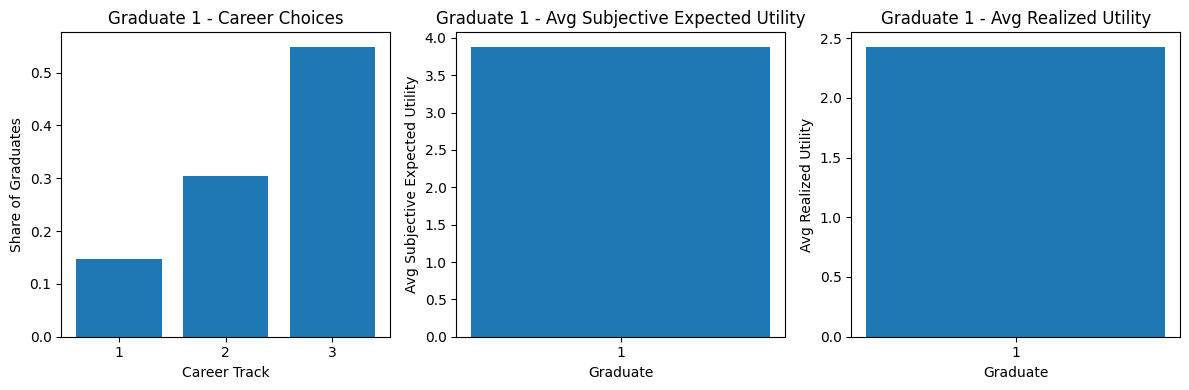

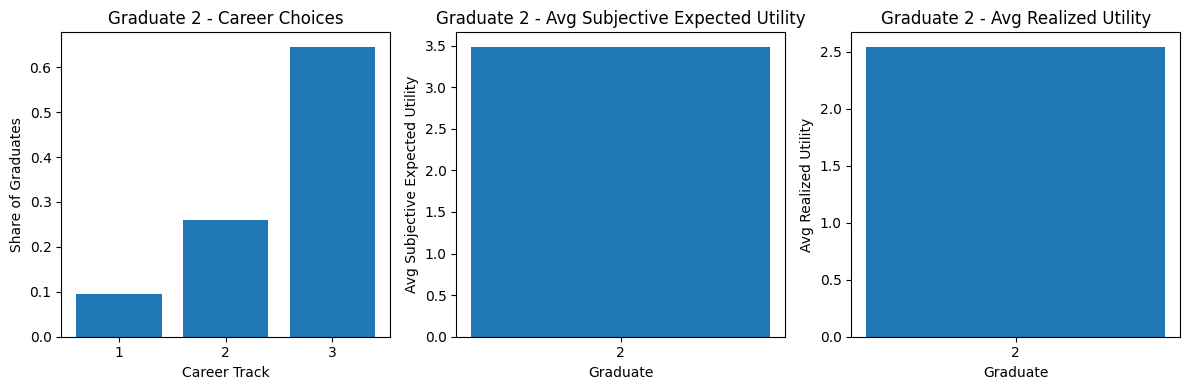

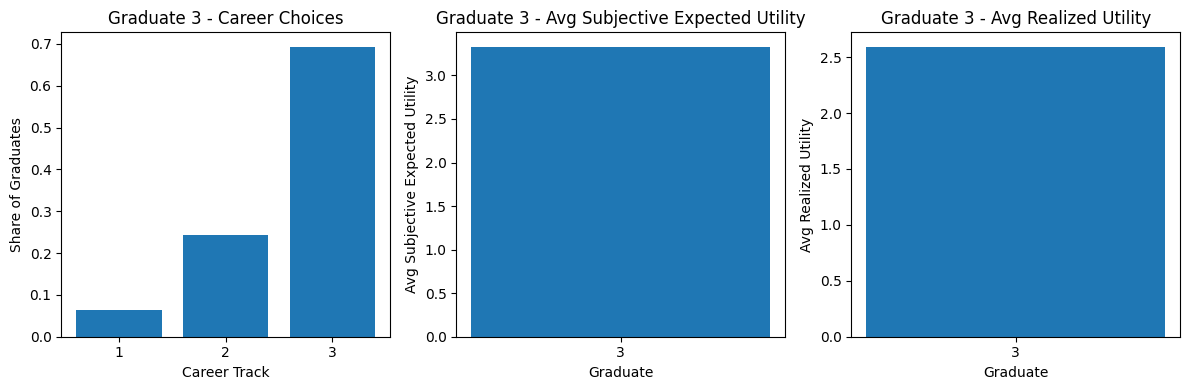

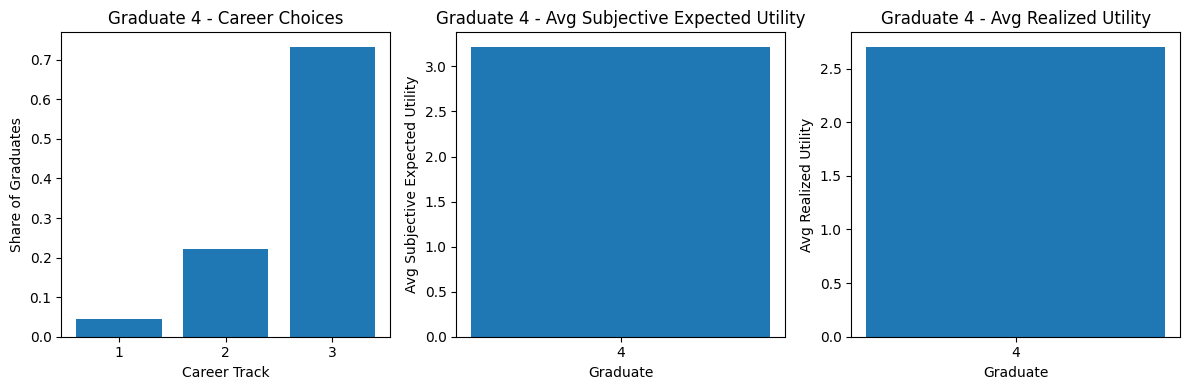

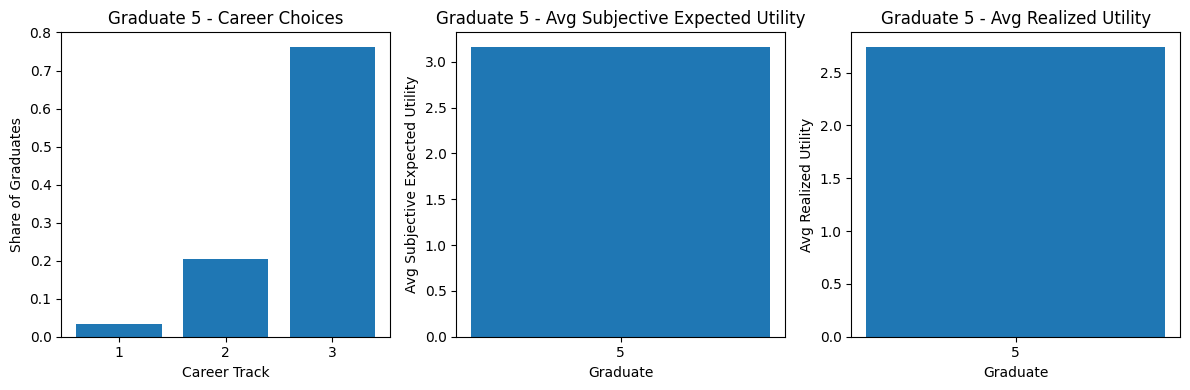

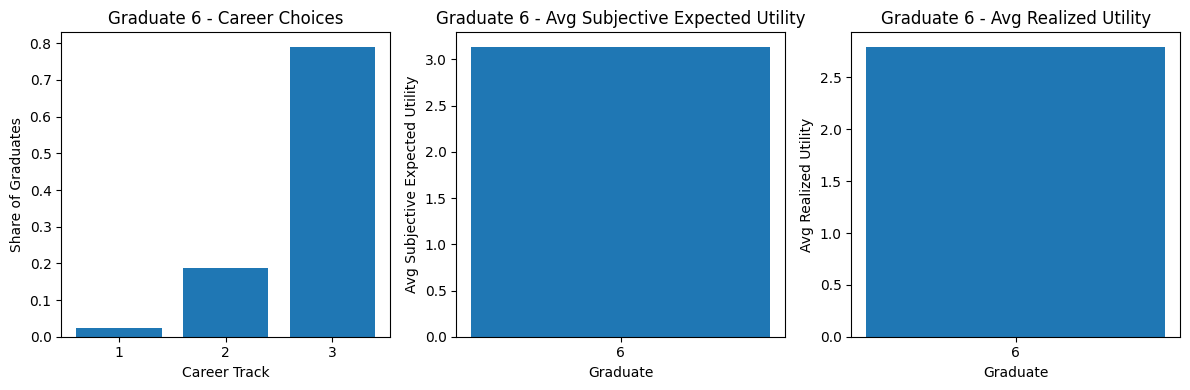

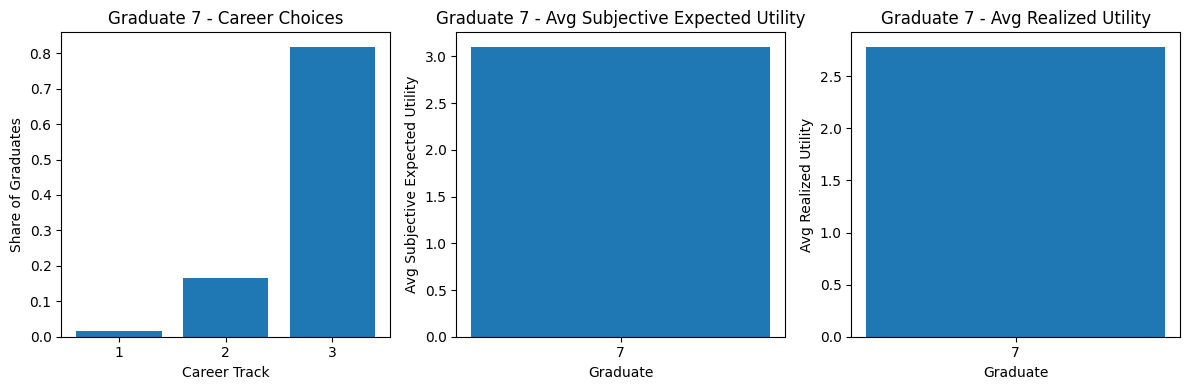

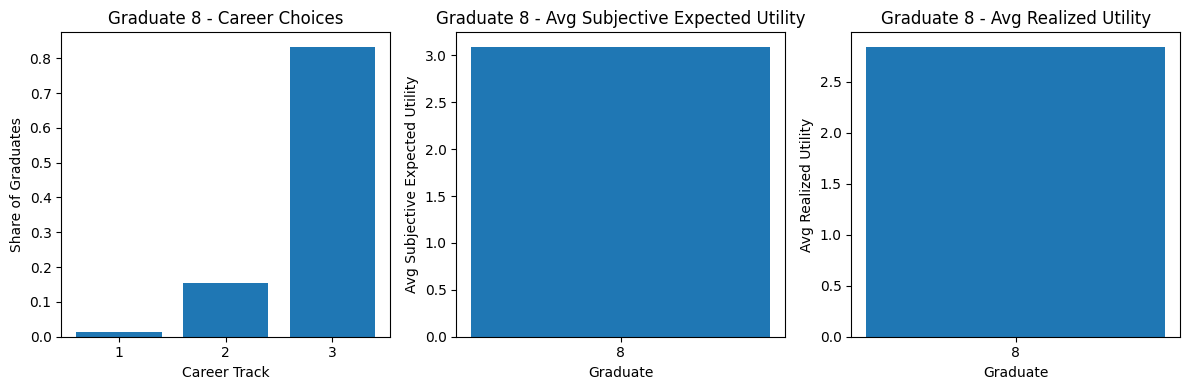

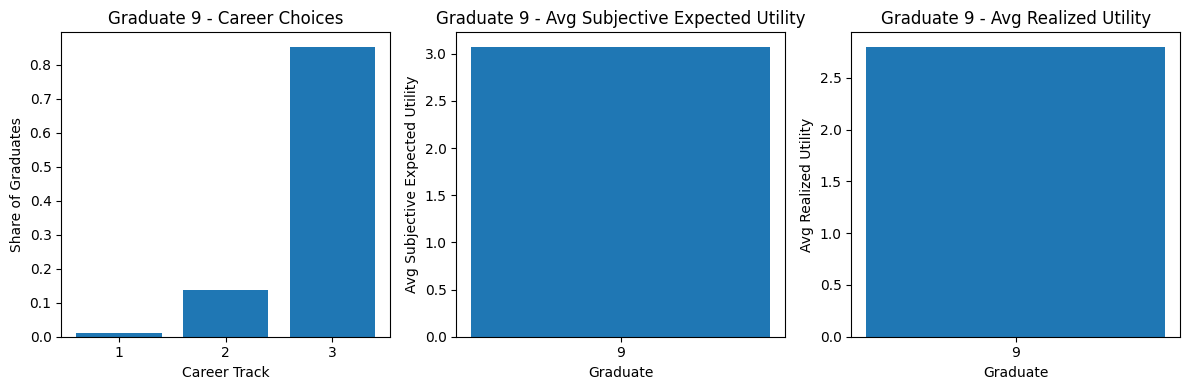

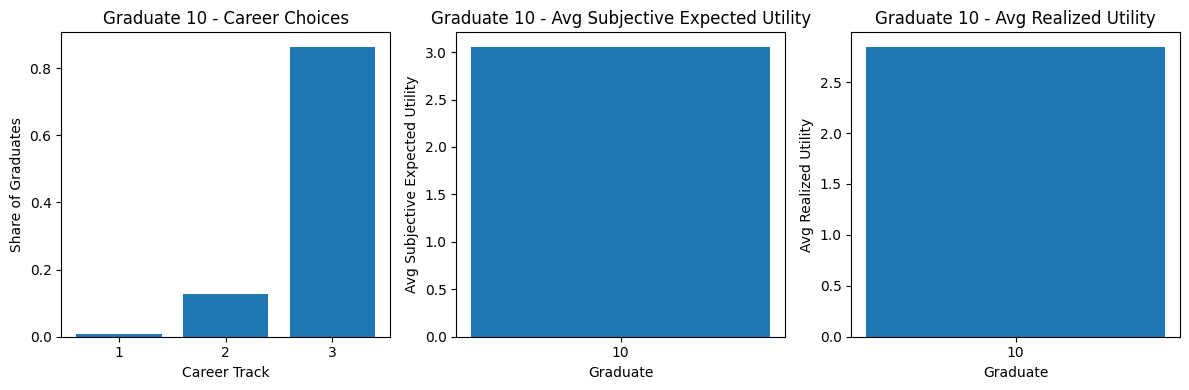

In [37]:
# Function to simulate the scenario and calculate required metrics
def simulate_and_visualize(par):
    np.random.seed(2021)
    
    # Initialize arrays to store results
    chosen_careers = np.zeros((par.N, par.K), dtype=int)
    prior_expectations = np.zeros((par.N, par.K))
    realized_utilities = np.zeros((par.N, par.K))
    
    for k in range(par.K):
        for i in range(par.N):
            F_i = par.F[i]
            
            # Draw noise terms for friends and self
            epsilon_friends = np.random.normal(0, par.sigma, (par.J, F_i)) 
            epsilon_self = np.random.normal(0, par.sigma, par.J)
            #print(epsilon_friends)
            
            # Calculate prior expected utility for each career
            prior_expected_utility = par.v + np.mean(epsilon_friends, axis=1) #axis=0
            #print(prior_expected_utility)   
            
            # Choose the career with the highest prior expected utility
            chosen_career = np.argmax(prior_expected_utility)
            
            # Store chosen career, prior expectation, and realized utility
            chosen_careers[i, k] = chosen_career
            prior_expectations[i, k] = prior_expected_utility[chosen_career]
            realized_utilities[i, k] = par.v[chosen_career] + epsilon_self[chosen_career]
    
    # Calculate average share of graduates choosing each career
    career_shares = np.zeros((par.N, par.J))
    for i in range(par.N):
        for j in range(par.J):
            career_shares[i, j] = np.mean(chosen_careers[i, :] == j)
    
    # Calculate average subjective expected utility and average realized utility
    avg_prior_expectations = np.mean(prior_expectations, axis=1)
    avg_realized_utilities = np.mean(realized_utilities, axis=1)
    
    # Visualize the results
    for i in range(par.N):
        plt.figure(figsize=(12, 4))
        
        # Share of graduates choosing each career
        plt.subplot(1, 3, 1)
        plt.bar(range(1, par.J + 1), career_shares[i, :])
        plt.xlabel('Career Track')
        plt.ylabel('Share of Graduates')
        plt.title(f'Graduate {i+1} - Career Choices')
        plt.xticks(range(1, par.J + 1), range(1, par.J + 1))  # Set x-tick labels to 1, 2, 3
        
        # Average subjective expected utility
        plt.subplot(1, 3, 2)
        plt.bar([i + 1], avg_prior_expectations[i])
        plt.xlabel('Graduate')
        plt.ylabel('Avg Subjective Expected Utility')
        plt.title(f'Graduate {i+1} - Avg Subjective Expected Utility')
        plt.xticks([i + 1], [i + 1])  # Set x-tick label to the graduate number
        
        # Average realized utility
        plt.subplot(1, 3, 3)
        plt.bar([i + 1], avg_realized_utilities[i])
        plt.xlabel('Graduate')
        plt.ylabel('Avg Realized Utility')
        plt.title(f'Graduate {i+1} - Avg Realized Utility')
        plt.xticks([i + 1], [i + 1])  # Set x-tick label to the graduate number
        
        plt.tight_layout()
        plt.show()

# Run the simulation and visualize the results
simulate_and_visualize(par)

Here we see that the first graduate 1. with one friend in each career more often chose career path 1 or 2 than graduate 10. who has ten friends in each career path. It can be seen that the more friends in each career path the closer Avg Subjective Expected utility is to the Avg Realized Utility. This is due to more information about the real utility.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

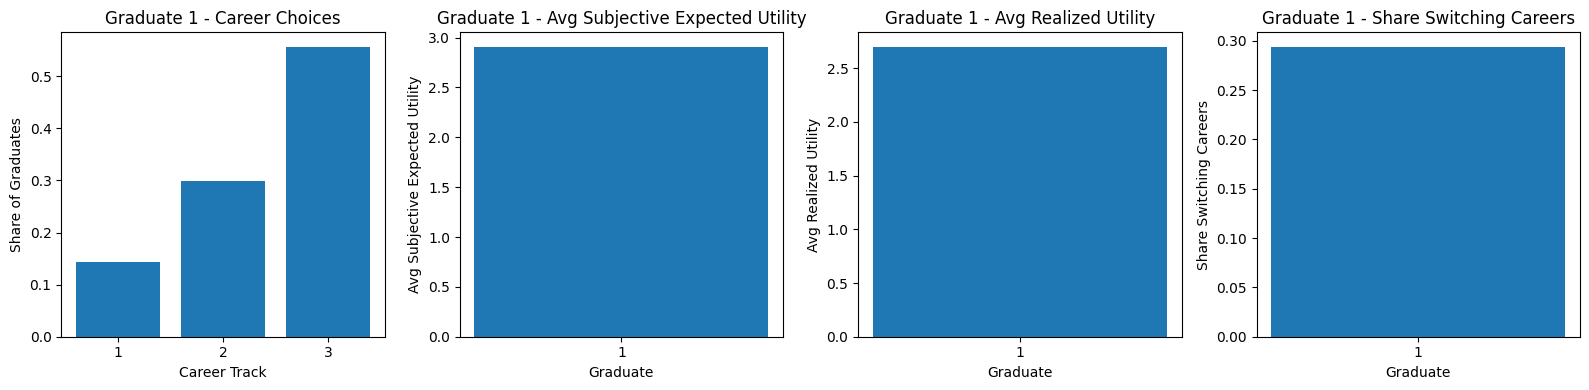

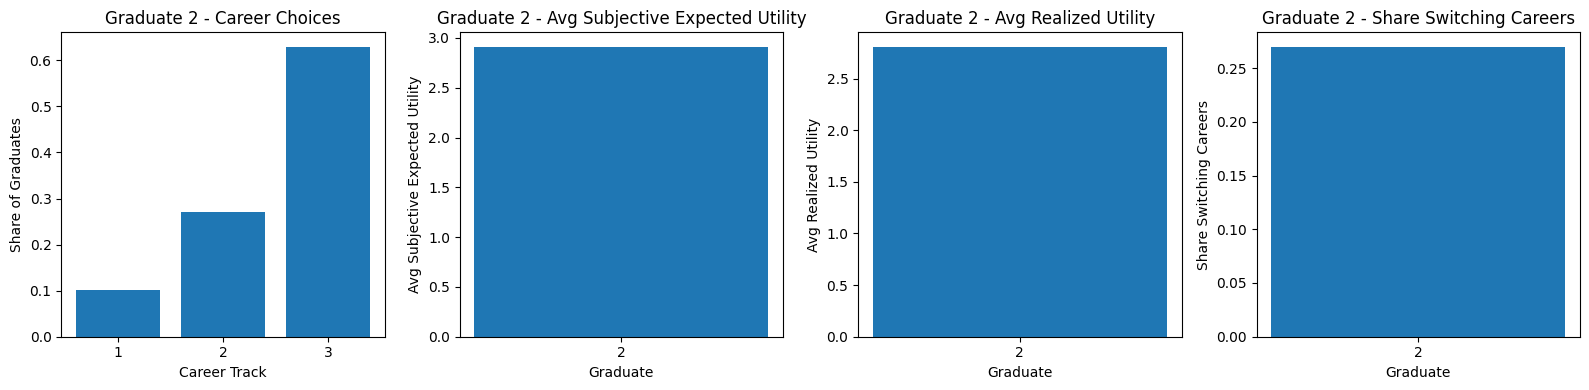

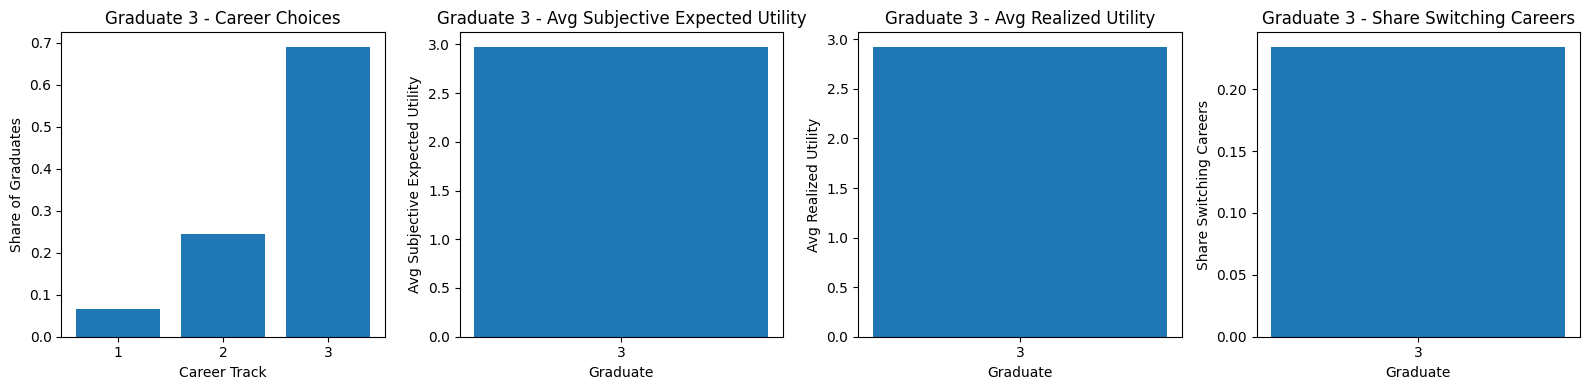

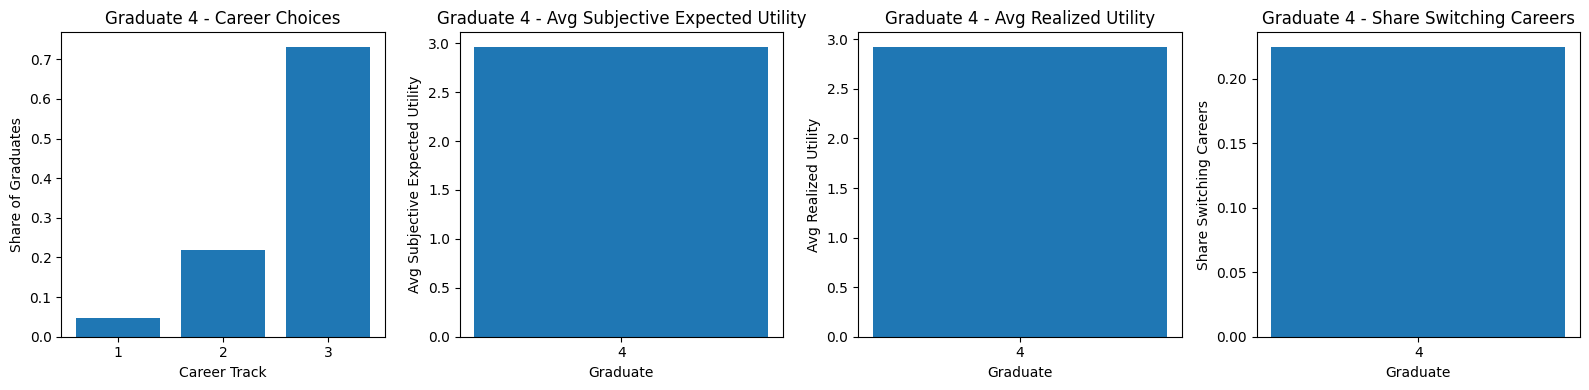

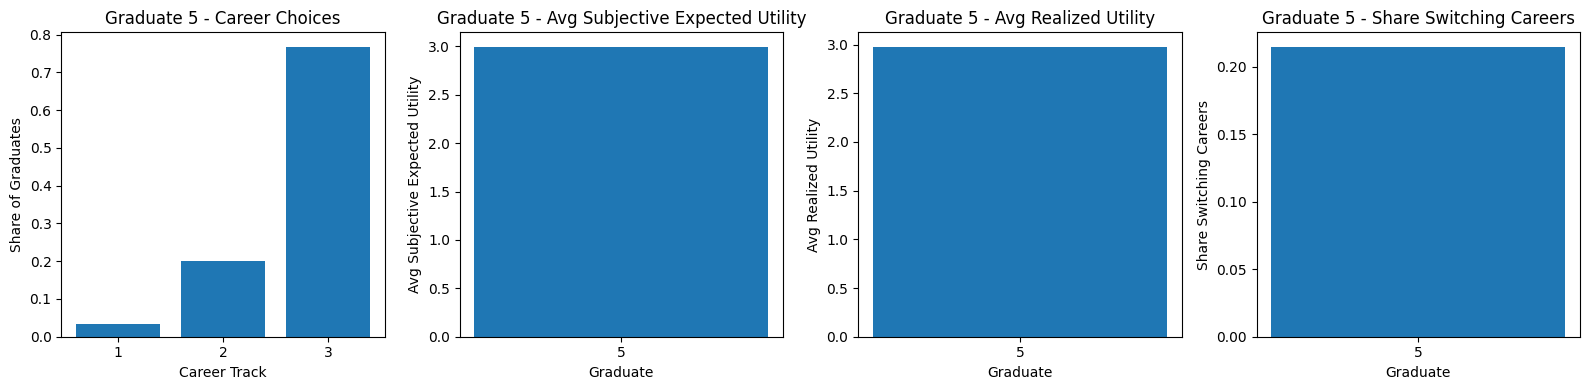

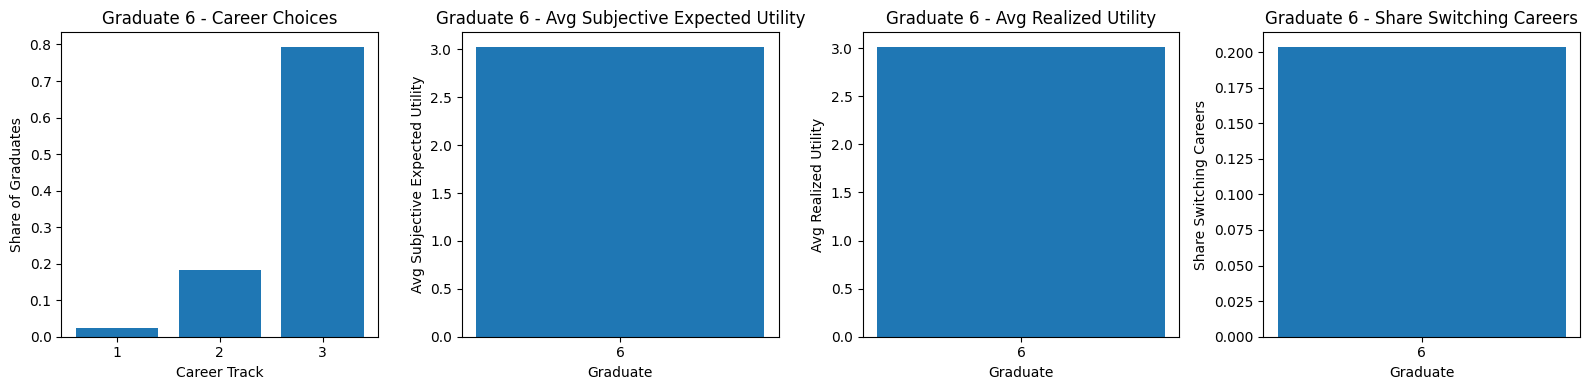

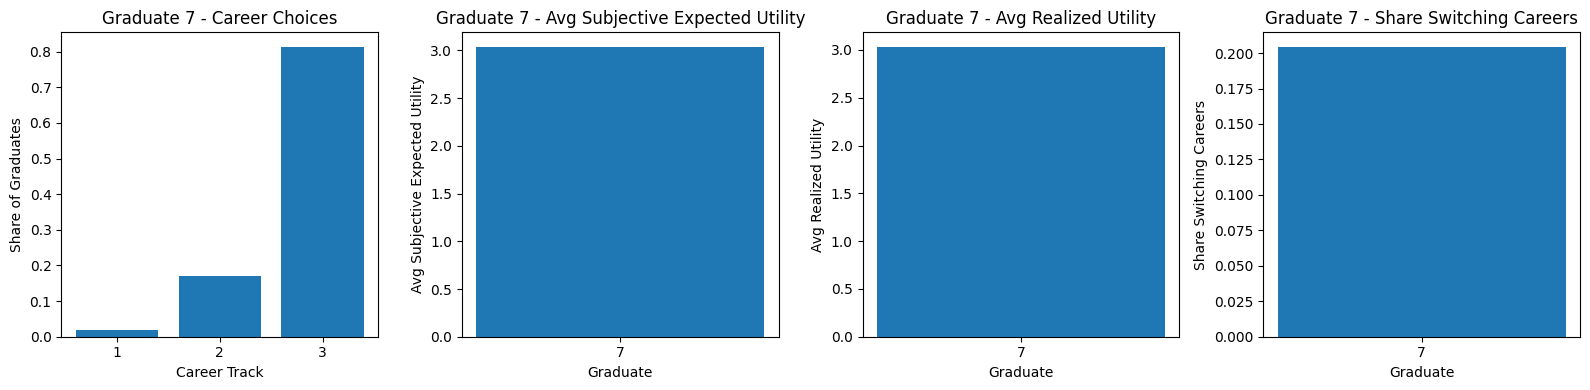

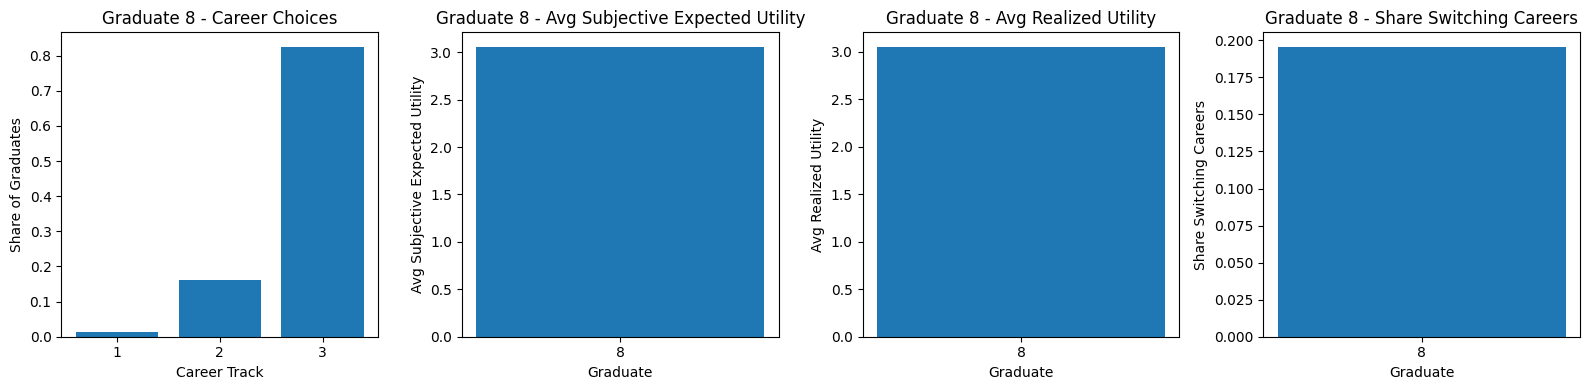

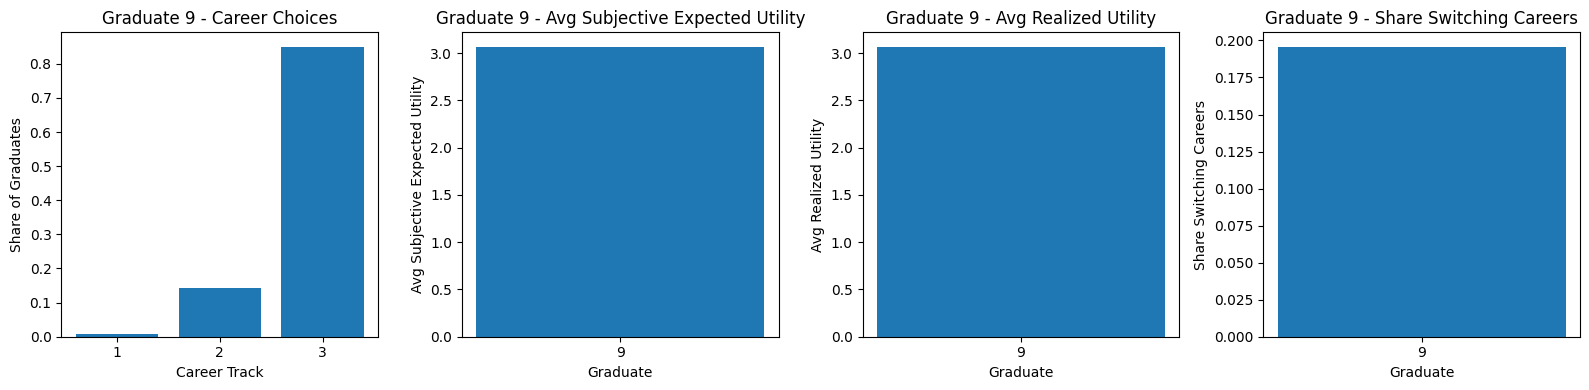

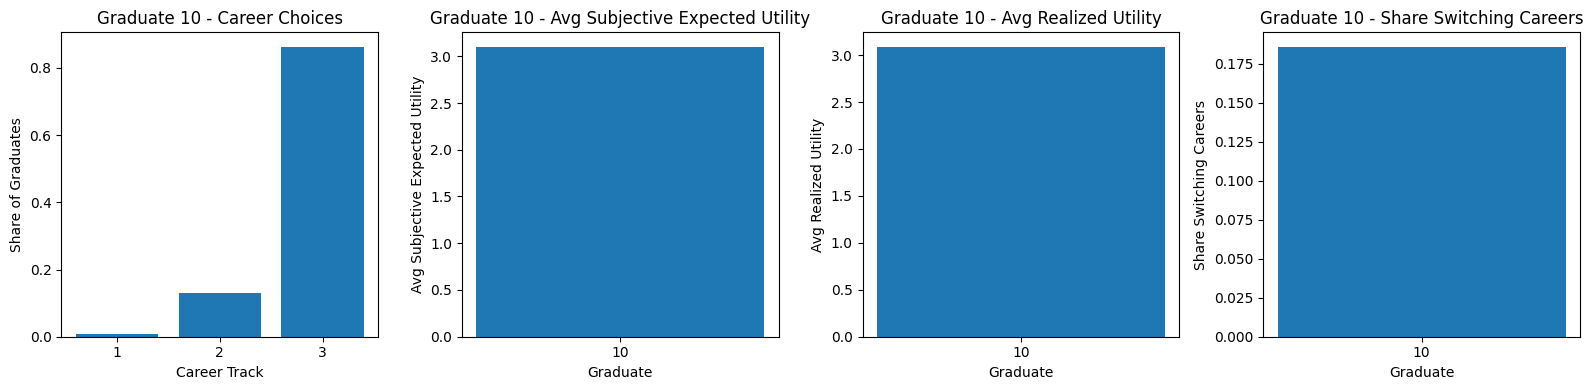

In [38]:
# Function to simulate the scenario and calculate required metrics
def simulate_and_visualize(par):
    np.random.seed(2021)
    
    # Initialize arrays to store results
    chosen_careers = np.zeros((par.N, par.K), dtype=int)
    prior_expectations = np.zeros((par.N, par.K))
    realized_utilities = np.zeros((par.N, par.K))
    new_prior_expectations = np.zeros((par.N, par.K))
    new_realized_utilities = np.zeros((par.N, par.K))
    switched_careers = np.zeros((par.N, par.K), dtype=bool)
    
    for k in range(par.K):
        for i in range(par.N):
            F_i = par.F[i]
            
            # Draw noise terms for friends and self
            epsilon_friends = np.random.normal(0, par.sigma, (F_i, par.J))
            epsilon_self = np.random.normal(0, par.sigma, par.J)
            
            # Calculate prior expected utility for each career
            prior_expected_utility = par.v + np.mean(epsilon_friends, axis=0)
            
            # Choose the career with the highest prior expected utility
            chosen_career = np.argmax(prior_expected_utility)
            
            # Store chosen career, prior expectation, and realized utility
            chosen_careers[i, k] = chosen_career
            prior_expectations[i, k] = prior_expected_utility[chosen_career]
            realized_utilities[i, k] = par.v[chosen_career] + epsilon_self[chosen_career]
            
            # After one year, update priors considering the switching cost
            updated_prior = np.copy(prior_expected_utility)
            updated_prior[chosen_career] = realized_utilities[i, k]
            for j in range(par.J):
                if j != chosen_career:
                    updated_prior[j] -= par.c
            
            # Choose the new optimal career
            new_chosen_career = np.argmax(updated_prior)
            new_prior_expectations[i, k] = updated_prior[new_chosen_career]
            new_realized_utilities[i, k] = (
                realized_utilities[i, k] if new_chosen_career == chosen_career else par.v[new_chosen_career] + np.random.normal(0, par.sigma) - par.c
            )
            
            # Check if the career was switched
            switched_careers[i, k] = (new_chosen_career != chosen_career)
    
    # Calculate average share of graduates choosing each career
    career_shares = np.zeros((par.N, par.J))
    for i in range(par.N):
        for j in range(par.J):
            career_shares[i, j] = np.mean(chosen_careers[i, :] == j)
    
    # Calculate average subjective expected utility and average realized utility
    avg_prior_expectations = np.mean(new_prior_expectations, axis=1)
    avg_realized_utilities = np.mean(new_realized_utilities, axis=1)
    
    # Calculate the share of graduates who switched careers
    switch_shares = np.mean(switched_careers, axis=1)
    
    # Visualize the results
    for i in range(par.N):
        plt.figure(figsize=(16, 4))
        
        # Share of graduates choosing each career
        plt.subplot(1, 4, 1)
        plt.bar(range(1, par.J + 1), career_shares[i, :])
        plt.xlabel('Career Track')
        plt.ylabel('Share of Graduates')
        plt.title(f'Graduate {i+1} - Career Choices')
        plt.xticks(range(1, par.J + 1), range(1, par.J + 1))  # Set x-tick labels to 1, 2, 3
        
        # Average subjective expected utility
        plt.subplot(1, 4, 2)
        plt.bar([i + 1], avg_prior_expectations[i])
        plt.xlabel('Graduate')
        plt.ylabel('Avg Subjective Expected Utility')
        plt.title(f'Graduate {i+1} - Avg Subjective Expected Utility')
        plt.xticks([i + 1], [i + 1])  # Set x-tick label to the graduate number
        
        # Average realized utility
        plt.subplot(1, 4, 3)
        plt.bar([i + 1], avg_realized_utilities[i])
        plt.xlabel('Graduate')
        plt.ylabel('Avg Realized Utility')
        plt.title(f'Graduate {i+1} - Avg Realized Utility')
        plt.xticks([i + 1], [i + 1])  # Set x-tick label to the graduate number
        
        # Share of graduates who switched careers
        plt.subplot(1, 4, 4)
        plt.bar([i + 1], switch_shares[i])
        plt.xlabel('Graduate')
        plt.ylabel('Share Switching Careers')
        plt.title(f'Graduate {i+1} - Share Switching Careers')
        plt.xticks([i + 1], [i + 1])  # Set x-tick label to the graduate number
        
        plt.tight_layout()
        plt.show()

# Run the simulation and visualize the results
simulate_and_visualize(par)

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [115]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

#print('x')
#print(X)
#print('y')
#print(y)


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [116]:
def find_A(X, y):
    valid_points = X[(X[:, 0] > y[0]) & (X[:, 1] > y[1])]
    if len(valid_points) == 0:
        return np.nan, np.nan
    distances = np.sqrt(np.sum((valid_points-y)**2, axis=1))
    return valid_points[np.argmin(distances)]

def find_B(X, y):
    valid_points = X[(X[:, 0] > y[0]) & (X[:, 1] < y[1])]
    if len(valid_points) == 0:
        return np.nan, np.nan
    distances = np.sqrt(np.sum((valid_points-y)**2, axis=1)) 
    return valid_points[np.argmin(distances)]

def find_C(X, y):
    valid_points = X[(X[:, 0] < y[0]) & (X[:, 1] < y[1])]
    if len(valid_points) == 0:
        return np.nan, np.nan
    distances = np.sqrt(np.sum((valid_points-y)**2, axis=1))
    return valid_points[np.argmin(distances)]

def find_D(X, y):
    valid_points = X[(X[:, 0] < y[0]) & (X[:, 1] > y[1])]
    if len(valid_points) == 0:
        return np.nan, np.nan
    distances = np.sqrt(np.sum((valid_points-y)**2, axis=1))
    return valid_points[np.argmin(distances)]

# Finding points A, B, C, and D
A = find_A(X, y)
B = find_B(X, y)
C = find_C(X, y)
D = find_D(X, y)

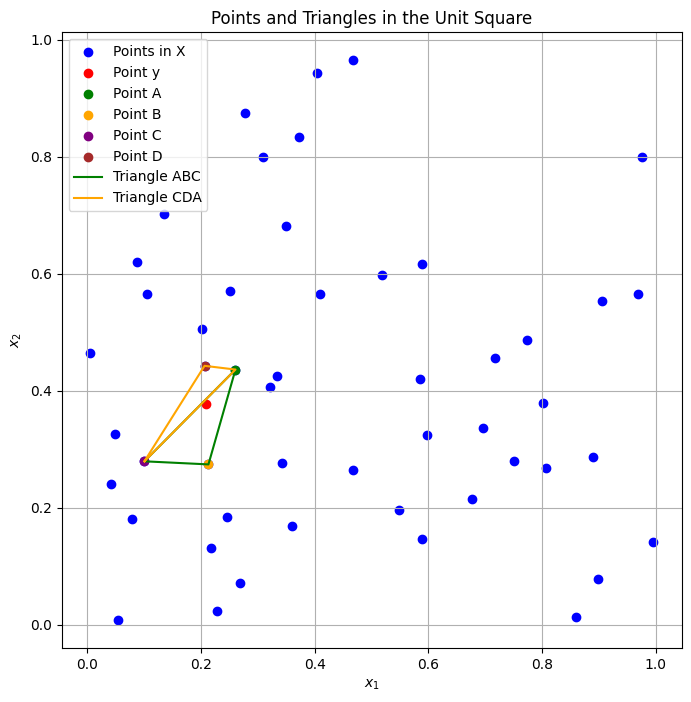

In [117]:
def plot_points_and_triangles(X, y, A, B, C, D):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], color='blue', label='Points in X')
    plt.scatter(y[0], y[1], color='red', label='Point y')
    
    if not np.isnan(A[0]):
        plt.scatter(A[0], A[1], color='green', label='Point A')
    if not np.isnan(B[0]):
        plt.scatter(B[0], B[1], color='orange', label='Point B')
    if not np.isnan(C[0]):
        plt.scatter(C[0], C[1], color='purple', label='Point C')
    if not np.isnan(D[0]):
        plt.scatter(D[0], D[1], color='brown', label='Point D')
    
    if not np.isnan(A[0]) and not np.isnan(B[0]) and not np.isnan(C[0]):
        plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='green', label='Triangle ABC')
    if not np.isnan(C[0]) and not np.isnan(D[0]) and not np.isnan(A[0]):
        plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='orange', label='Triangle CDA')
    
    plt.legend()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Points and Triangles in the Unit Square')
    plt.grid(True)
    plt.show()

plot_points_and_triangles(X, y, A, B, C, D)

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [118]:
# the barycenter coordinates of a triangle
def barycentric_coordinates(A, B, C, y):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

In [119]:
# Calculate barycentric coordinates if the points are valid
if not np.isnan(A[0]) and not np.isnan(B[0]) and not np.isnan(C[0]): # if A[0] is not NaN
    r_ABC_1, r_ABC_2, r_ABC_3 = barycentric_coordinates(A, B, C, y)
    print(f'Barycentric coordinates in triangle ABC:, r1 = {r_ABC_1:4f}, r2 = {r_ABC_2:4f}, r3 = {r_ABC_3:4f}')
if not np.isnan(C[0]) and not np.isnan(D[0]) and not np.isnan(A[0]):
    r_CDA_1, r_CDA_2, r_CDA_3 = barycentric_coordinates(C, D, A, y)
    print(f'Barycentric coordinates in triangle CDA: r1 = {r_CDA_1:4f}, r2 = {r_CDA_2:4f}, r3 = {r_CDA_3:4f}')

Barycentric coordinates in triangle ABC:, r1 = 0.628626, r2 = 0.069101, r3 = 0.302272
Barycentric coordinates in triangle CDA: r1 = 0.368260, r2 = -0.133927, r3 = 0.765667


It is given that a point, here the point $y$, is in side an arbitrary triangle, here $ABC$ or $CDA$ then $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$. From above we see that $r^{CDA}_2 < 0$ and therefor is $y$ not in the triangle $CDA$, but $r^{ABC}_1, r^{ABC}_2$ and $r^{ABC}_3 \in [0,1]$ so $y$ is inside $ABC$.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [120]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [121]:
# Compute the approximation of $f(y)$ using the full algorithm
def approximation(A, B, C, D, r_ABC_1, r_ABC_2, r_ABC_3, r_CDA_1, r_CDA_2, r_CDA_3):
    """**Algorithm:**"""
    """
    1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
    2. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
    3. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
    4. Return `NaN`."""

    if not np.isnan(A[0]) and not np.isnan(B[0]) and not np.isnan(C[0]) and r_ABC_1 >= 0 and r_ABC_1<=1 and r_ABC_2 >= 0 and r_ABC_2<=1 and r_ABC_3 >= 0 and r_ABC_3<=1:
        return r_ABC_1 * f(A) + r_ABC_2 * f(B) + r_ABC_3 * f(C)
    elif not np.isnan(C[0]) and not np.isnan(D[0]) and not np.isnan(A[0]) and r_CDA_1 >= 0 and r_CDA_2 >= 0 and r_CDA_3 >= 0 and r_CDA_1<=1 and r_CDA_2<=1 and r_CDA_3<=1:
        return r_CDA_1 * f(C) + r_CDA_2 * f(D) + r_CDA_3 * f(A)
    else:
        return np.nan
    
    
approximation_y = approximation(A, B, C, D, r_ABC_1, r_ABC_2, r_ABC_3, r_CDA_1, r_CDA_2, r_CDA_3)
true_y = f(y)
print(f'Approximation of f(y): {approximation_y}')
print(f'True value of f(y): {true_y}')


Approximation of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [135]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [129]:
# write your answer here
def q3_y1():
    A_1 = find_A(X, Y[2])
    B_1 = find_B(X, Y[2])
    C_1 = find_C(X, Y[2])
    D_1 = find_D(X, Y[2])
    print(f'A_1 = {A_1}, B_2 = {B_1}, C_3 = {C_1}, D_4 = {D_1}')

    if not np.isnan(A_1[0]) and not np.isnan(B_1[0]) and not np.isnan(C_1[0]):
        r_ABC_1, r_ABC_2, r_ABC_3 = barycentric_coordinates(A_1, B_1, C_1, Y[0])
        print(f'Barycentric coordinates in triangle ABC:, r1 = {r_ABC_1:4f}, r2 = {r_ABC_2:4f}, r3 = {r_ABC_3:4f}')
    if not np.isnan(C_1[0]) and not np.isnan(D_1[0]) and not np.isnan(A_1[0]):
        r_CDA_1, r_CDA_2, r_CDA_3 = barycentric_coordinates(C_3, D_4, A_1, Y[0])
        print(f'Barycentric coordinates in triangle CDA: r1 = {r_CDA_1:4f}, r2 = {r_CDA_2:4f}, r3 = {r_CDA_3:4f}')
    
    if not np.isnan(A_1[0]) and not np.isnan(B_1[0]) and not np.isnan(C_1[0]) and r_ABC_1 >= 0 and r_ABC_1<=1 and r_ABC_2 >= 0 and r_ABC_2<=1 and r_ABC_3 >= 0 and r_ABC_3<=1:
        return r_ABC_1 * f(A_1) + r_ABC_2 * f(B_1) + r_ABC_3 * f(C_1)
    elif not np.isnan(C_1[0]) and not np.isnan(D_1[0]) and not np.isnan(A_1[0]) and r_CDA_1 >= 0 and r_CDA_2 >= 0 and r_CDA_3 >= 0 and r_CDA_1<=1 and r_CDA_2<=1 and r_CDA_3<=1:
        return r_CDA_1 * f(C_1) + r_CDA_2 * f(D_1) + r_CDA_3 * f(A_1)
    else:
        return np.nan  

approximation_y_1 = q3_y1()
true_y_1 = f(Y[2])
print(f'Approximation of f(y): {approximation_y_1}')
print(f'True value of f(y): {true_y_1}')

A_1 = (nan, nan), B_2 = [0.9756222  0.79942844], C_3 = [0.58875932 0.61680751], D_4 = [0.46801905 0.96493021]
Approximation of f(y): nan
True value of f(y): 0.6400000000000001


In [145]:
def q3_y1(X, Y):
    results = []

    for i in range(len(Y)):
        A_1 = find_A(X, Y[i])
        B_1 = find_B(X, Y[i])
        C_1 = find_C(X, Y[i])
        D_1 = find_D(X, Y[i])
        
        #print(f'A_1 = {A_1}, B_1 = {B_1}, C_1 = {C_1}, D_1 = {D_1}')

        if not np.isnan(A_1[0]) and not np.isnan(B_1[0]) and not np.isnan(C_1[0]):
            r_ABC_1, r_ABC_2, r_ABC_3 = barycentric_coordinates(A_1, B_1, C_1, Y[i])
            #print(f'Barycentric coordinates in triangle ABC: r1 = {r_ABC_1:.4f}, r2 = {r_ABC_2:.4f}, r3 = {r_ABC_3:.4f}')
        if not np.isnan(C_1[0]) and not np.isnan(D_1[0]) and not np.isnan(A_1[0]):
            r_CDA_1, r_CDA_2, r_CDA_3 = barycentric_coordinates(C_1, D_1, A_1, Y[i])
            #print(f'Barycentric coordinates in triangle CDA: r1 = {r_CDA_1:.4f}, r2 = {r_CDA_2:.4f}, r3 = {r_CDA_3:.4f}')
            
        if not np.isnan(A_1[0]) and not np.isnan(B_1[0]) and not np.isnan(C_1[0]) and r_ABC_1 >= 0 and r_ABC_1<=1 and r_ABC_2 >= 0 and r_ABC_2<=1 and r_ABC_3 >= 0 and r_ABC_3<=1:
            approximation_y_1 = r_ABC_1 * f(A_1) + r_ABC_2 * f(B_1) + r_ABC_3 * f(C_1)
            true_y_1 = f(Y[i])
            print(f'Approximation of f(Y[{i}]): {approximation_y_1}')
            print(f'True value of f(Y[{i}]): {true_y_1}')
            results.append(approximation_y_1)
            continue  # Continue to the next iteration  # Return the approximation for the first valid triangle found

        elif not np.isnan(C_1[0]) and not np.isnan(D_1[0]) and not np.isnan(A_1[0]) and r_CDA_1 >= 0 and r_CDA_2 >= 0 and r_CDA_3 >= 0 and r_CDA_1<=1 and r_CDA_2<=1 and r_CDA_3<=1:
            approximation_y_1 = r_CDA_1 * f(C_1) + r_CDA_2 * f(D_1) + r_CDA_3 * f(A_1)
            true_y_1 = f(Y[i])
            print(f'Approximation of f(Y[{i}]): {approximation_y_1}')
            print(f'True value of f(Y[{i}]): {true_y_1}')
            results.append(approximation_y_1)
            continue  # Continue to the next iteration # Return the approximation for the second valid triangle found
        
        
        # If no valid triangle found for this Y[i], continue to next iteration
        else:
            true_y_1 = f(Y[i])
            print(f'No valid triangle found for Y[{i}].')
            print(f'True value of f(Y[{i}]): {true_y_1}')
    
    return np.nan  # If no valid triangles found for any Y[i], return NaN

# Assuming X, Y, find_A, find_B, find_C, find_D, barycentric_coordinates, and f are defined appropriately

# Call the function q3_y1 and print the results
approximation_y_1 = q3_y1(X, Y)

# Print the final result outside the function
#print(f'Final Approximation: {approximation_y_1}')

Approximation of f(Y[0]): 0.04032631372248057
True value of f(Y[0]): 0.04000000000000001
Approximation of f(Y[1]): 0.15874233999349835
True value of f(Y[1]): 0.16000000000000003
No valid triangle found for Y[2].
True value of f(Y[2]): 0.6400000000000001
Approximation of f(Y[3]): 0.15874233999349835
True value of f(Y[3]): 0.16000000000000003
Approximation of f(Y[4]): 0.2512901561119622
True value of f(Y[4]): 0.25
